In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [2]:
df = pd.read_csv("/home/adityasingh/Downloads/energydata_complete.csv")

In [3]:
data=df[['date','Appliances']]
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [4]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.date)

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515


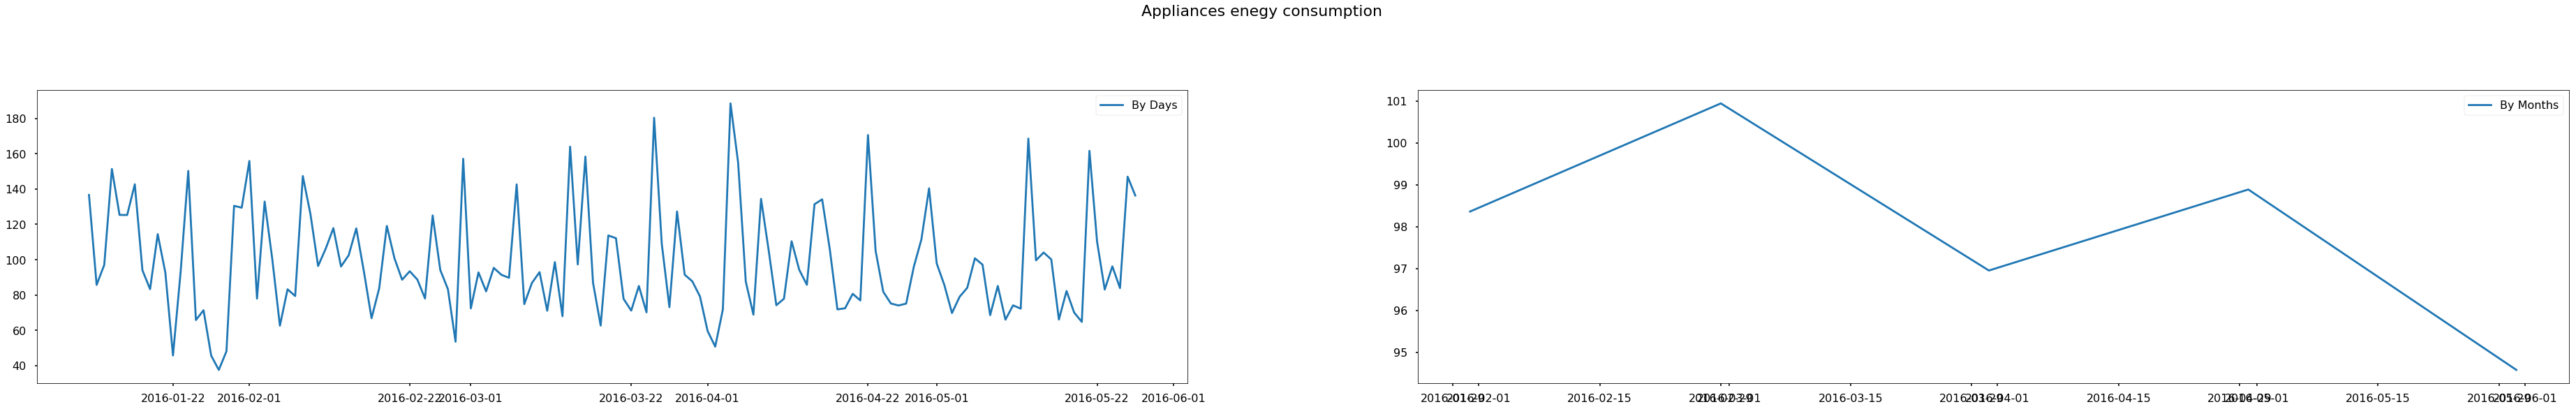

In [5]:
fig = plt.figure(figsize=[65, 17])
plt.suptitle('Appliances enegy consumption', fontsize=22)

plt.subplot(221)
plt.plot(df.Appliances, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Appliances, '-', label='By Months')
plt.legend()

In [6]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Appliances)[1])

Dickey–Fuller test: p=0.000000


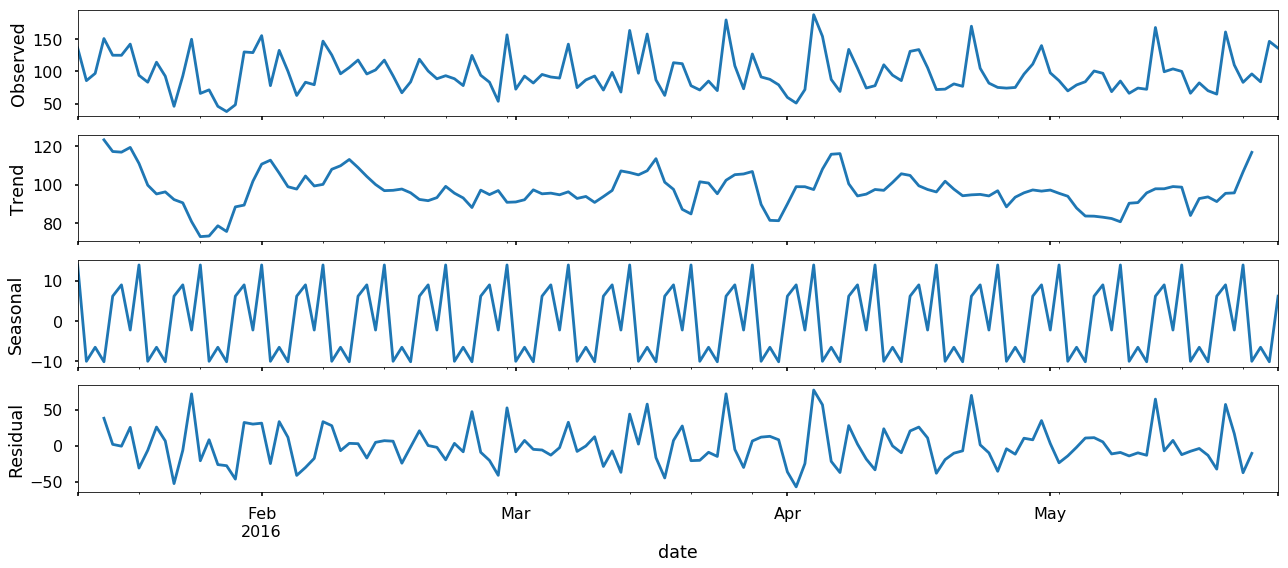

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Appliances, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1658.753276396917
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1428.6726154053754
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1313.1647659322539
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1106.9819680495546
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1318.1457992688975
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1246.8123896151355
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1152.488241122183
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1108.9482703352146
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1541.3587631153237
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1359.5348550786784
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1300.637993635858
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1097.6124476468337
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1315.2894811471033
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1237.244714997176
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1154.311133886329
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1099.587671723717
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1393.4310643175716
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1273.777886397227

In [10]:
mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    172.874     -0.006      0.995    -339.827     337.827
ar.S.L12      -0.1437      0.094     -1.526      0.127      -0.328       0.041
sigma2       907.5887   1.57e+05      0.006      0.995   -3.07e+05    3.08e+05


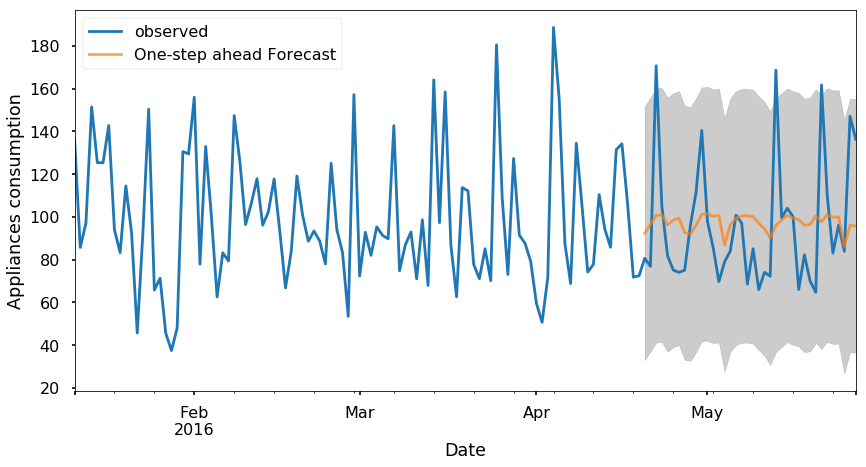

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-20'), dynamic=False)
pred_ci = pred.conf_int()

ax = df.Appliances['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Appliances consumption')
plt.legend()

plt.show()

In [12]:
y_forecasted = pred.predicted_mean
y_truth = df.Appliances['2016-04-20':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 803.0


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 28.34


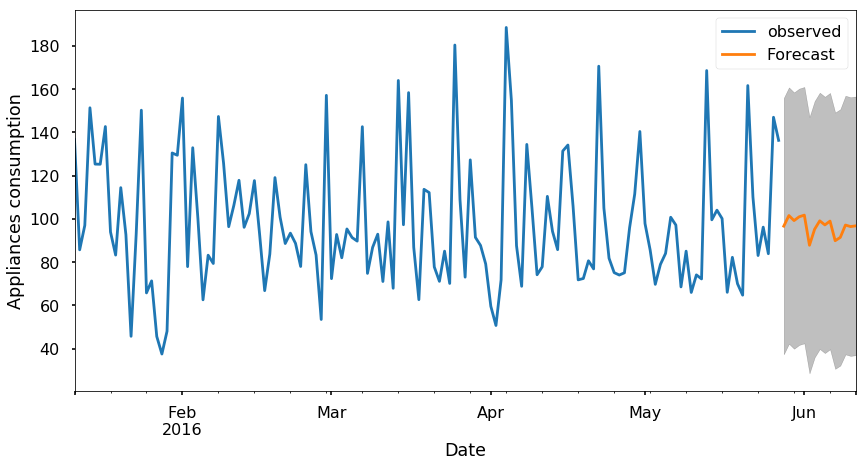

In [16]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()

ax = df.Appliances.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Appliances consumption')

plt.legend()
plt.show()

In [38]:
import pandas as pd
from fbprophet import Prophet

data = data.rename(columns={'date': 'ds', 'Appliances': 'y'})
model = Prophet(interval_width=0.95)
model.fit(data)

future = model.make_future_dataframe(periods=10, freq='D')
forecast = model.predict(future)

plt.figure(figsize=(30, 6))
model.plot(future, xlabel = 'Date', ylabel = 'comsumption')
plt.title('Appliances consumption');

ImportError: cannot import name 'pythran_is_numpy_func_supported'